In [57]:
# all imports
import pandas as pd # for dataframe
import tweepy # for twitter api
from tweepy.parsers import JSONParser # for parsing json
import json #for dumping into a text file
import requests # for downloading using URL
import re # for regular expressions
import seaborn as sns # for visualization

In [104]:
# Step1 : read from the given csv file and store it
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
# Step2 : Download image predictions file programmatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

try:
    response = requests.get(url)
    with open ( url.split('/')[-1], mode = 'wb')  as file :
        file.write(response.content)  
except exception as e :
    print("EXCEPTION!")
    
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

images.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [4]:
# Step 3: Get Tweet info and store it

# Using tweepy api 

consumer_key = '############'
consumer_secret = '############'
access_token = '#############'
access_secret = '##############'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                parser= JSONParser(),
                wait_on_rate_limit= True,
                wait_on_rate_limit_notify= True,
                retry_count=5, retry_delay=5
                
                ) 

In [ ]:
# writing tweet info into a text file

errors_list = list()

with open('tweet_json.txt', 'w') as outfile:
    for each_id in archive_df['tweet_id']:
        
        try:
            page= api.get_status(each_id,tweet_mode = 'extended')
            #print(json.dumps(page, indent = 4))
            #break
            json.dump(page, outfile)
            outfile.write("\n")  
                                   
        except Exception as e :
            
            print(str(each_id) + '->' + str(e))
            errors_list.append(each_id)

print("tweets not found = ", len(errors_list))    

In [ ]:
num_lines = sum(1 for line in open('tweet_json.txt'))
num_lines


In [6]:
# load the data in a list and create a dataframe
tweets_list = list()
with open('tweet_json.txt') as file:
    for each_line in file:
        try:
            tweet = json.loads(each_line)
            tweets_list.append(tweet)
        except:
            continue

df_api = pd.DataFrame(tweets_list, columns=list(tweets_list[31].keys()))
# tweets_list[31] is a retweet. so it will have the columns related to retweets

df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 30 columns):
created_at                       2345 non-null object
id                               2345 non-null int64
id_str                           2345 non-null object
full_text                        2345 non-null object
truncated                        2345 non-null bool
display_text_range               2345 non-null object
entities                         2345 non-null object
source                           2345 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2345 non-null object
geo                              0 non-null object
coordinates                      0 non-null object
place                            1 non-null ob

In [7]:
# filter only the required columns for analysis

df_filtered = df_api[['id','retweet_count','favorite_count','created_at','retweeted_status']]
df_filtered.columns


Index(['id', 'retweet_count', 'favorite_count', 'created_at',
       'retweeted_status'],
      dtype='object')

### Assess

###### Visual assessment:

In [107]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [108]:
images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [52]:
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,NaN,8575,38747,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,NaN,6303,33197,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,NaN,4187,24999,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,NaN,8702,42147,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,NaN,9459,40286,False,False,False,False,en


##### Programmatic assessment:

In [47]:
archive_df['rating_numerator'].unique()
# 420,960,666,182,121,143,204 all are wacky
archive_df.rating_denominator.unique()
# 15,70,170,130,150,90 are very different
print(archive_df[archive_df.rating_denominator == 170]['text'][1120]) # group of dogs
print(archive_df[archive_df.rating_numerator == 960]['text'][313])# has two ratings
print(archive_df[archive_df.rating_denominator == 70]['text'][433])
print(archive_df[archive_df.rating_numerator == 420]['text'][2074])
print(archive_df[archive_df.rating_denominator == 130]['text'][1634])
print(archive_df[archive_df.rating_numerator == 0]['text'][1016])


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


OBSERVATION:
1. Few tweets have unbelievable ratings
2. Some tweets have two ratings
3. Some tweets have many dogs so more than one rating
4. Some tweets have rating numerator as 0


In [205]:
# images table
# ASSESS: check if any tweets do not have images
images_copy = images_copy[pd.notnull(images_copy['jpg_url'])] #without pics
images_copy.info()
# looks like all tweets have images 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.2+ KB


ISSUES FOUND:

#### 1.Archive_df table:

1. tweet_id has to be string as it is categorical.
2. check for null values(archive_df.isnull().sum() )
   Observation: The fields which have majority of them as null could be removed:
   in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
3. Few names of the dogs are misspelt or null ( archive_df.tail())
4. 181 ids are retweets (archive_df.info()), which can be removed
5. Timestamp must be a datetime object
6. Rating numerator and denominator have absurd values


#### 2. Images table:
1. Images that are not recognised as dogs can be removed
2. There are only 2075 rows as compared to archive_df which has 2356 rows. Here,
   the ids are not consistent.
3. tweet_id has to be string as it is categorical.


#### 3. df_filtered table
1. 170 tweets are retweets. These can be removed.
2. Change id to tweet_id to be consistent with other two tables
3. tweet_id has to be string as it is categorical.


### TIDINESS:
1. In archive_df, dog breeds can be a single column rather than rows
2. We need to merge these 3 dataframes to one in order to have all the info
   at one place.
3. The columns predicting dog breeds can be condensed.

 ### CLEANING :

####  archive_copy table:

In [234]:
#Make copy of the dataframe

archive_copy = archive_df.copy()

NOTE: Cleaning has not been done in the same order as listed above

In [235]:
# DEFINE :Convert tweet_id to be string as it is categorical.
# CODE:
archive_copy['tweet_id']= archive_copy['tweet_id']. astype('str')

#TEST

type(archive_copy['tweet_id'].iloc[0])

str

In [236]:
# DEFINE :timestamp must be a datetime object
#CODE:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])
# TEST :
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [242]:
#DEFINE :Rating numerator and denominator are different from that in the text
# Get ratings and treat them depending to their situation
ratings = archive_copy['text'].apply(lambda x: re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x))
print(ratings)

0       [(13, , 13, 10)]
1       [(13, , 13, 10)]
2       [(12, , 12, 10)]
3       [(13, , 13, 10)]
4       [(12, , 12, 10)]
5       [(13, , 13, 10)]
6       [(13, , 13, 10)]
7       [(13, , 13, 10)]
8       [(13, , 13, 10)]
9       [(14, , 14, 10)]
10      [(13, , 13, 10)]
11      [(13, , 13, 10)]
12      [(13, , 13, 10)]
13      [(12, , 12, 10)]
14      [(13, , 13, 10)]
15      [(13, , 13, 10)]
16      [(12, , 12, 10)]
17      [(13, , 13, 10)]
18      [(13, , 13, 10)]
19      [(13, , 13, 10)]
20      [(12, , 12, 10)]
21      [(13, , 13, 10)]
22      [(14, , 14, 10)]
23      [(13, , 13, 10)]
24      [(13, , 13, 10)]
25      [(12, , 12, 10)]
26      [(13, , 13, 10)]
27      [(13, , 13, 10)]
28      [(13, , 13, 10)]
29      [(12, , 12, 10)]
              ...       
2326      [(2, , 2, 10)]
2327      [(7, , 7, 10)]
2328      [(9, , 9, 10)]
2329    [(11, , 11, 10)]
2330      [(6, , 6, 10)]
2331      [(8, , 8, 10)]
2332    [(10, , 10, 10)]
2333      [(9, , 9, 10)]
2334      [(3, , 3, 10)]


In [243]:
# Add new columns to store the new ratings and the count of dogs in each tweet
numerator = []
denominator = []
dogs_count = []

for rate in ratings:
    # Tweets with no rating
    if len(rate) == 0:
        numerator.append('NaN')
        denominator.append('NaN')
        dogs_count.append(1) # It has a picture so it is a dog
    
    # Tweets with one rate
    elif len(rate) == 1:
        numerator.append((float(rate[0][0]) / (float(rate[0][-1])/10)))
        denominator.append(float(rate[0][-1]))
        dogs_count.append(float(rate[0][-1]) / 10) 
    # We assume that the ratings who had rating_denominator different than 10
    # are for group of dogs i.e : https://t.co/yGQI3He3xv
    # we take the average of the tweet with more than one rating
    elif len(rate) > 1 and rate[0][-1] == '10':
        rating_plus = 0
        rating_avg = 0
        for i in range(len(rate)):
            rating_plus = rating_plus + float(rate[i][0])
        result_avg = (rating_plus / len(rate))
        numerator.append(result_avg)
        denominator.append(10)
        dogs_count.append(len(rate))
    else: # without this block I get ValueError: Length of values does not match length of index
          # We will try to catch the errors this  why and see why this happend
        numerator.append('Error')
        denominator.append('Error')
        dogs_count.append('Error')

archive_copy['new_rating_numerator'] = numerator
archive_copy['new_rating_denominator'] = denominator
archive_copy['dogs_count'] = dogs_count
archive_copy['new_rating_numerator'].value_counts()

12.0                 560
11.0                 466
10.0                 453
13.0                 351
9.0                  158
8.0                  100
14.0                  56
7.0                   55
5.0                   33
6.0                   32
3.0                   19
4.0                   14
2.0                   10
1.0                    8
9.5                    5
8.5                    4
Error                  3
NaN                    3
7.5                    3
15.0                   3
420.0                  2
9.75                   2
10.5                   2
11.5                   2
0.0                    2
1776.0                 1
11.26                  1
9.666666666666666      1
5.5                    1
6.5                    1
13.5                   1
666.0                  1
182.0                  1
11.27                  1
4.5                    1
Name: new_rating_numerator, dtype: int64

In [244]:
# Look what the error is :
print(archive_copy[archive_copy.new_rating_numerator == 'Error']['text'][1202])
print(archive_copy[archive_copy.new_rating_numerator == 'Error']['text'][1165])
print(archive_copy[archive_copy.new_rating_numerator == 'Error']['text'][313])

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


1. Note that the errors are because there are two ratings available, of which
    only one is valid.
2. Also there are few outliers which we can omit during visualisation.



In [245]:
# Correct the errors in the above list
tweet_id_11 = archive_copy[archive_copy.new_rating_numerator == 'Error']['tweet_id'][1202]
tweet_id_13 = archive_copy[archive_copy.new_rating_numerator == 'Error']['tweet_id'][1165]
tweet_id_13a = archive_copy[archive_copy.new_rating_numerator == 'Error']['tweet_id'][313]

archive_copy.loc[archive_copy['tweet_id'] == tweet_id_11, 'new_rating_numerator'] = 11
archive_copy.loc[archive_copy['tweet_id'] == tweet_id_13, 'new_rating_numerator'] = 13
archive_copy.loc[archive_copy['tweet_id'] == tweet_id_13a, 'new_rating_numerator'] = 13


archive_copy.loc[archive_copy['dogs_count'] == 'Error', 'dogs_count'] = 1
archive_copy.loc[archive_copy['new_rating_denominator'] == 'Error', 'new_rating_denominator'] = 10

# Test
print(archive_copy.new_rating_numerator[archive_copy.tweet_id == tweet_id_11])
print(archive_copy.new_rating_numerator[archive_copy.tweet_id == tweet_id_13])
print(archive_copy.new_rating_numerator[archive_copy.tweet_id == tweet_id_13a])


1202    11
Name: new_rating_numerator, dtype: object
1165    13
Name: new_rating_numerator, dtype: object
313    13
Name: new_rating_numerator, dtype: object


In [259]:
#look for rating for numerators with NaN value

print(archive_copy[archive_copy.new_rating_numerator == 'NaN']['text'][342])
print(archive_copy[archive_copy.new_rating_numerator == 'NaN']['text'][516])
print(archive_copy[archive_copy.new_rating_numerator == 'NaN']['text'][1663])

"""
Observation:
looks like there is no rating specified in the text. 

"""


@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible


'\nObservation:\nlooks like there is no rating specified in the text. \n\n'

In [251]:
# Look for errors in denominators
print (archive_copy['new_rating_denominator'].value_counts())
archive_copy[archive_copy.new_rating_denominator == 'Error']['tweet_id']
 
# DEFINE: the same ids have error in numerator and denominator.
#We can use the same variables tweet_id_11 etc, to correct the errors 

10.0     2340
NaN         3
80.0        2
50.0        2
170.0       1
150.0       1
130.0       1
120.0       1
110.0       1
90.0        1
70.0        1
40.0        1
20.0        1
Name: new_rating_denominator, dtype: int64


Series([], Name: tweet_id, dtype: object)

In [252]:
#CODE:
archive_copy.loc[archive_copy['tweet_id'] == tweet_id_11, 'new_rating_denominator'] = 10
archive_copy.loc[archive_copy['tweet_id'] == tweet_id_13, 'new_rating_denominator'] = 10
archive_copy.loc[archive_copy['tweet_id'] == tweet_id_13a, 'new_rating_denominator'] = 10
# TEST:
print (archive_copy['new_rating_denominator'].value_counts())


10.0     2340
NaN         3
80.0        2
50.0        2
170.0       1
150.0       1
130.0       1
120.0       1
110.0       1
90.0        1
70.0        1
40.0        1
20.0        1
Name: new_rating_denominator, dtype: int64


In [253]:
# DEFINE: Delete the retweets

retweet_ids = archive_copy[pd.isnull(archive_copy.retweeted_status_id) == False ].tweet_id

#CODE:
retweets = archive_copy[pd.isnull(archive_copy.retweeted_status_id) == False ]['tweet_id'] .index
archive_copy.drop (retweets, inplace = True)

#TEST:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
new_rating_numerator         

In [254]:
# DEFINE: correct the names of the dogs which are null or misspelt
# using regular expressions and store them in a new column.
#CODE:

import re

dog_names = []
no_names =[]

def extract_names(row):

    text = row['text']
    # 'This is Phineas' and the first letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip('.').strip(','))
    # 'Meet Phineas' 
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip('.').strip(','))
    # 'Say hello to Phineas'
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip('.').strip(','))
    # 'Here we have Phineas' 
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip('.').strip(','))
    # 'named Phineas' 
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('Nameless')
        no_names.append(text.split())


archive_copy.apply(extract_names,axis= 1)        
print(len(dog_names))
archive_copy['dog_names'] = dog_names 

#TEST:
print(archive_copy['dog_names'].value_counts())


2175
Nameless     765
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Daisy          7
Stanley        6
Jax            6
Koda           6
Toby           6
Bella          6
Oscar          6
Bo             6
Bailey         6
Rusty          5
Leo            5
Milo           5
Buddy          5
Scout          5
Louis          5
Chester        5
Bentley        5
Gus            4
Brody          4
Gary           4
            ... 
Fred           1
Bradley        1
Nimbus         1
Dudley         1
Harry          1
Dobby          1
Wylie          1
Carly          1
Covach         1
Shooter        1
Gromit         1
Johm           1
Shadoe         1
Herb           1
Snoopy         1
JD             1
Lacy           1
Rambo          1
Heinrich       1
Jockson        1
Philippe       1
Augie          1
Hector         1
Anthony        1
Adele          1
Jed            1
Charleson      1
Saydee   

In [255]:
# DEFINE: Combine the 'dog stage' columns into one

#CODE:

dog_stage = []

string_in = ['puppo', 'pupper', 'doggo', 'floofer']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in archive_copy['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_stage.append(string_out[string_in.index(word)])
            break
    else:
        dog_stage.append('None')

archive_copy['dog_stage'] = dog_stage

#TEST:
archive_copy['dog_stage'].value_counts()


None       1790
pupper      260
doggo        83
puppo        33
floofer       9
Name: dog_stage, dtype: int64

In [256]:
# DEFINE: Remove unwanted columns , columns with null values

#CODE:

drop_cols = ['in_reply_to_status_id','in_reply_to_user_id',
             'retweeted_status_id','retweeted_status_user_id',
            'retweeted_status_timestamp','source','expanded_urls',
              'name','doggo', 'floofer', 'pupper', 'puppo',
              'rating_numerator', 'rating_denominator']
archive_copy.drop(drop_cols, axis = 1 , inplace = True) 

#TEST:
archive_copy .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id                  2175 non-null object
timestamp                 2175 non-null datetime64[ns]
text                      2175 non-null object
new_rating_numerator      2175 non-null object
new_rating_denominator    2175 non-null object
dogs_count                2175 non-null object
dog_names                 2175 non-null object
dog_stage                 2175 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 152.9+ KB


#### Images table

In [216]:
# make copy of the dataframe:
images_copy = images.copy()

# DEFINE: Convert tweet_id as string 
images_copy['tweet_id'] = images_copy['tweet_id'] .astype('str')

#TEST:
print (type(images_copy['tweet_id'].iloc[0]))

<class 'str'>


In [217]:
# DEFINE: Remove rows in df_breeds_clean where:
# * All probabilities of p1_dog are False
# * The Probabilities of p2_dog and p2_dog are lower than 0.2 or false

# Find indexes of pictures not of dogs
not_dog = images_copy[(images_copy["p1_dog"] == False) &
         (images_copy["p2_dog"] == False) &
         (images_copy["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are unlikely to be dogs
unlikely_dog = images_copy[(images_copy["p1_dog"] == False) &
         (images_copy["p2_conf"] < 0.2) &
        (images_copy["p3_conf"] < 0.2)]["tweet_id"].index

# Put both series into the same variable
remove_row = not_dog.append(unlikely_dog)

images_copy.drop(remove_row,inplace = True)

# TEST:
images_copy[(images_copy["p1_dog"] == False)]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
371,672980819271634944,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,1,car_mirror,0.232754,False,basset,0.219461,True,beagle,0.112397,True
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
473,675146535592706048,https://pbs.twimg.com/media/CV6aMToXIAA7kH4.jpg,1,dingo,0.288447,False,Cardigan,0.229944,True,Pembroke,0.190407,True
525,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True


In [218]:
# DEFINE: Since p1_dog is always true and has the highest probability of being
# the correct prediction, we can find the correct one by checking the confidence values

predicted_breed =list()
conf = list()


def predict_breed_algorithm(row) :
    max_conf = max(row['p1_conf'], row['p2_conf'],row['p3_conf'])
    
    if row['p1_dog'] == True and row['p1_conf'] >= max_conf :
        predicted_breed .append (row['p1'])
        conf.append (row['p1_conf'])
    elif row['p2_dog'] | row['p3_dog'] == True:
        max_conf = max(row['p2_conf'],row['p3_conf'])
        
        if (row['p2_conf'] >= max_conf):
            predicted_breed.append(row['p2']) 
            conf.append(row['p2_conf'])
        else :
            predicted_breed.append(row['p3'])
            conf.append(row['p3_conf'])
    else:
        predicted_breed.append('Unidentifiable')
        conf.append( 0.0)

images_copy.apply(predict_breed_algorithm, axis =1)   
images_copy['predicted_breed'] = predicted_breed
images_copy['confidence'] = conf

# TEST:
images_copy.head()
        

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [219]:
images_copy.columns


Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'predicted_breed',
       'confidence'],
      dtype='object')

In [220]:
# DEFINE: drop the unwanted columns
#CODE:
remove_cols = [ 'img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' ]
images_copy.drop (remove_cols, axis =1 , inplace= True)

#TEST:
images_copy.tail()

,tweet_id,jpg_url,predicted_breed,confidence
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


#### 3.df_filtered table 

In [213]:
# make copy of the dataframe
api_copy = df_filtered.copy()
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 5 columns):
id                  2345 non-null int64
retweet_count       2345 non-null int64
favorite_count      2345 non-null int64
created_at          2345 non-null object
retweeted_status    170 non-null object
dtypes: int64(3), object(2)
memory usage: 91.7+ KB


In [221]:
# DEFINE :In api_copy,Change id to tweet_id to be consistent with other two tables

#CODE :
api_copy.rename(columns = {'id': 'tweet_id'} ,  inplace= True)

# convert it to string
api_copy['tweet_id'] = api_copy['tweet_id']. astype('str')

#TEST

type(archive_copy['tweet_id'].iloc[0])


str

In [222]:
# DEFINE: remove retweets
# CODE:
api_copy = api_copy[pd.isnull(api_copy['retweeted_status']) == True]
api_copy.drop('retweeted_status',axis =1 , inplace= True)

In [223]:
# TEST :
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2344
Data columns (total 4 columns):
tweet_id          2175 non-null object
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
created_at        2175 non-null object
dtypes: int64(2), object(2)
memory usage: 85.0+ KB


#### Merge the tables

In [257]:
df_master = pd.merge(archive_copy, images_copy, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, api_copy, how = 'left', on = ['tweet_id'])
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                  2175 non-null object
timestamp                 2175 non-null datetime64[ns]
text                      2175 non-null object
new_rating_numerator      2175 non-null object
new_rating_denominator    2175 non-null object
dogs_count                2175 non-null object
dog_names                 2175 non-null object
dog_stage                 2175 non-null object
jpg_url                   1508 non-null object
predicted_breed           1508 non-null object
confidence                1508 non-null float64
retweet_count             2175 non-null int64
favorite_count            2175 non-null int64
created_at                2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 254.9+ KB


In [225]:
#remove repetitive columns
df_master.drop('created_at',axis =1, inplace = True)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                  2175 non-null object
timestamp                 2175 non-null datetime64[ns]
text                      2175 non-null object
new_rating_numerator      2175 non-null object
new_rating_denominator    2175 non-null object
dogs_count                2175 non-null object
dog_names                 2175 non-null object
dog_stage                 2175 non-null object
jpg_url                   1508 non-null object
predicted_breed           1508 non-null object
confidence                1508 non-null float64
retweet_count             2175 non-null int64
favorite_count            2175 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 237.9+ KB


#### Store the dataframes :

In [258]:
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8',index= False)

#### ANALYSIS AND VISUALIZATION:

In [227]:


#imports:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as datetime

# read the data
df_tweet = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [228]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                  2175 non-null int64
timestamp                 2175 non-null object
text                      2175 non-null object
new_rating_numerator      2172 non-null object
new_rating_denominator    2172 non-null float64
dogs_count                2175 non-null object
dog_names                 2175 non-null object
dog_stage                 2175 non-null object
jpg_url                   1508 non-null object
predicted_breed           1508 non-null object
confidence                1508 non-null float64
retweet_count             2175 non-null int64
favorite_count            2175 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 221.0+ KB


In [229]:
df_tweet.describe()

,tweet_id,new_rating_denominator,confidence,retweet_count,favorite_count
count,2.175000e+03,2172.000000,1508.000000,2175.000000,2175.000000
mean,7.371205e+17,10.474217,0.607326,2703.164598,8685.298851
std,6.748668e+16,6.961484,0.262348,4652.832236,12367.888591
min,6.660209e+17,10.000000,0.044333,0.000000,51.000000
25%,6.768432e+17,10.000000,0.381920,587.500000,1865.500000
50%,7.098528e+17,10.000000,0.609568,1300.000000,3948.000000
75%,7.894226e+17,10.000000,0.847062,3112.000000,10862.000000
max,8.924206e+17,170.000000,0.999956,77234.000000,143195.000000


#### OBSERVATION:
 We see an outlier(1776.0) for the rating_numerator column and 170 for rating_denominator column.

In [230]:
#check for duplicates
df_tweet.duplicated().sum()

0

In [232]:
df_tweet[df_tweet['new_rating_numerator']== 1776]  #see the outlier


,tweet_id,timestamp,text,new_rating_numerator,new_rating_denominator,dogs_count,dog_names,dog_stage,jpg_url,predicted_breed,confidence,retweet_count,favorite_count


In [114]:
df_tweet[df_tweet["favorite_count"]== 143195] # most favorited dog
#df_tweet[df_tweet["retweet_count"]== 77234] # most retweeted 



,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_names,dog_stage,jpg_url,predicted_breed,confidence,retweet_count,favorite_count
348,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,Nameless,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,49044,143195


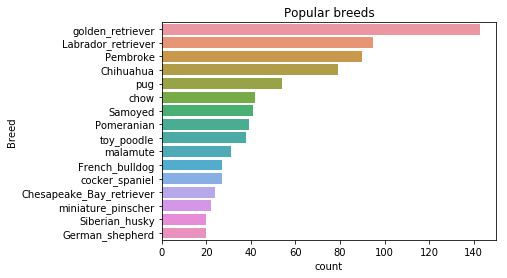

In [115]:
# Popular Breeds
top_breeds=df_tweet.groupby('predicted_breed').filter(lambda x: len(x) >= 20)
breed_count=top_breeds['predicted_breed'].value_counts()
sns.barplot(breed_count,breed_count.index)
plt.title('Popular breeds');
plt.xlabel('count')
plt.ylabel('Breed');

In [116]:
#The above plot clearly states that golden retriver is the most popular breed.

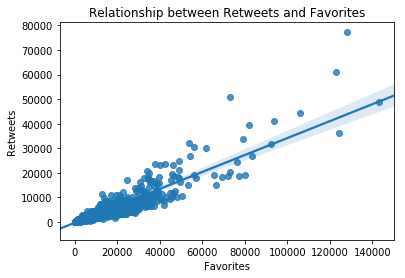

In [117]:
# seaborn regplot
axs=sns.regplot('favorite_count','retweet_count',data = df_tweet)
axs.set(xlabel = 'Favorites', ylabel = 'Retweets')
plt.title('Relationship between Retweets and Favorites')
plt.show()

OBSERVATION:
People favorited the tweet more often than retweeting the tweet.This is evident from the large favorite_count.

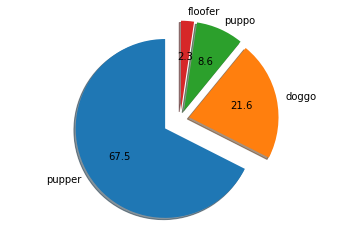

In [118]:
# Distribution of different dos stages 

dog_stage_count = list(df_tweet[df_tweet['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_tweet[df_tweet['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90,autopct = '%.1f')
ax1.axis('equal') ; # Equal aspect ratio ensures that pie is drawn as a circle.